In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
import gc

## Preprocessing

In [0]:
train = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/trainA.csv')

# test = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/testA.csv')


In [0]:
train.isna().sum()

Unnamed: 0                   0
building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [0]:
train1 = train.drop(['year_built','floor_count','cloud_coverage','Unnamed: 0'], axis=1)

In [0]:
train1.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,25.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,25.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,25.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
train1.groupby('primary_use')['meter_reading'].mean().sort_values()

primary_use
Religious worship                   5.375846
Warehouse/storage                  54.362314
Technology/science                138.204258
Other                             138.703786
Retail                            139.782388
Parking                           169.386801
Lodging/residential               279.710439
Manufacturing/industrial          285.897005
Public services                   288.237846
Food sales and service            304.908018
Entertainment/public assembly     473.880691
Utility                           512.736861
Office                            526.504420
Healthcare                        738.597583
Services                         4113.468284
Education                        4585.091840
Name: meter_reading, dtype: float64

In [0]:
lst1 = list(train1.groupby('primary_use')['meter_reading'].mean().sort_values().index)
lst1
lst2 = list(range(1,(len(lst1)+1)))
di = dict(zip(lst1,lst2))
print(di)

{'Religious worship': 1, 'Warehouse/storage': 2, 'Technology/science': 3, 'Other': 4, 'Retail': 5, 'Parking': 6, 'Lodging/residential': 7, 'Manufacturing/industrial': 8, 'Public services': 9, 'Food sales and service': 10, 'Entertainment/public assembly': 11, 'Utility': 12, 'Office': 13, 'Healthcare': 14, 'Services': 15, 'Education': 16}


In [0]:
train1['primary_use'].replace(di, inplace=True)
train1.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
train1.isna().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         96658
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676
dtype: int64

In [0]:
train2 = train1.ffill()

In [0]:
train2.isna().sum()

building_id              0
meter                    0
timestamp                0
meter_reading            0
site_id                  0
primary_use              0
square_feet              0
air_temperature          0
dew_temperature          0
precip_depth_1_hr     2301
sea_level_pressure       0
wind_direction           0
wind_speed               0
dtype: int64

In [0]:
train2 =  train2.fillna(0)


In [0]:
train2.isnull().any()

building_id           False
meter                 False
timestamp             False
meter_reading         False
site_id               False
primary_use           False
square_feet           False
air_temperature       False
dew_temperature       False
precip_depth_1_hr     False
sea_level_pressure    False
wind_direction        False
wind_speed            False
dtype: bool

In [0]:
train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0


In [0]:
write1 = train2.to_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/trainAA.csv')

In [0]:
train2['sin_dire'] = np.sin(2*np.pi*(train2.wind_direction/360))
train2['cos_dire'] = np.cos(2*np.pi*(train2.wind_direction/360))

train2['sin_s'] = train2['wind_speed']*train2['sin_dire']
train2['cos_s'] = train2['wind_speed']*train2['cos_dire']

train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,sin_dire,cos_dire,sin_s,cos_s
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
train2.plot.scatter('sin_s','cos_s').set_aspect('equal')

In [0]:
train2 = train2.drop(['wind_direction','wind_speed','sin_dire','cos_dire'],axis=1)

In [0]:
del train

In [0]:
del train1

In [0]:
train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0


In [0]:
train2['timestamp'] = pd.to_datetime(train2.timestamp)

train2['Hour'] = train2['timestamp'].dt.hour
train2['HOD'] = train2['Hour'].apply(lambda x: (x+1)*60*60)

seconds_in_day = 24*60*60

train2['sin_time'] = np.sin(2*np.pi*train2.HOD/seconds_in_day)
train2['cos_time'] = np.cos(2*np.pi*train2.HOD/seconds_in_day)

train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,Hour,HOD,sin_time,cos_time
0,0,0,2016-01-01,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926
1,1,0,2016-01-01,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926
2,2,0,2016-01-01,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926


In [0]:
train2['DOY'] = train2['timestamp'].dt.dayofyear

In [0]:
train2.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'sin_s', 'cos_s', 'Hour',
       'HOD', 'sin_time', 'cos_time', 'DOY'],
      dtype='object')

In [0]:
train2 = train2.drop('timestamp',axis=1)
train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,Hour,HOD,sin_time,cos_time,DOY
0,0,0,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1
1,1,0,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1
2,2,0,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1


In [0]:
train2 = train2.drop(['Hour','HOD'],axis=1)
train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1


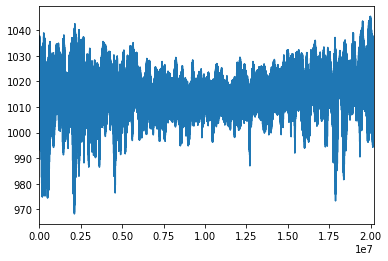

In [0]:
# train2['square_feet'].plot()
train2['sea_level_pressure'].plot()

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train2[['square_feet']] = scaler.fit_transform(train2[['square_feet']])

train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,0.008173,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,0.002786,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,0.005822,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train2[['sea_level_pressure']] = scaler.fit_transform(train2[['sea_level_pressure']])

train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,0.008173,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,0.002786,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,0.005822,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1


In [0]:
write1= train2.to_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/train_A_final.csv')

# site_is == 0 & building_id < 25 - test set for imputing zero mean-meter readings days (from day 1 to 40)

In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [4]:
import lightgbm as lgb

In [70]:
train2 = pd.read_csv('./Data/train_A_final.csv',index_col=0)

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [44]:
train31 = train2[(train2['site_id']==0) & (train2['building_id'] <25) & (train2['meter'] == 0)]
train31.shape

(219600, 15)

In [59]:
train3 = train31.copy()

In [60]:
train3.shape

(219600, 15)

In [48]:
del train2

In [76]:
train3.shape,train2.shape

((135000, 15), (20216100, 15))

In [159]:
# del test2

In [9]:
test2 = pd.read_csv('./Data/test_A_final.csv',index_col=0)

In [12]:
test3 = test2[(test2['site_id']==0) & (test2['building_id'] <25) & (test2['meter'] == 0)]
test3.shape

(438000, 14)

In [61]:
test31 = test3.copy()

In [33]:
# del test2

In [15]:
test3.groupby('meter').meter.count()

meter
0    438000
Name: meter, dtype: int64

In [50]:
test31.shape

(438000, 14)

In [ ]:
# 

In [73]:
# remove missing value rows for site_id == 0,

train3 = train3.drop(train3[((train3['building_id'] == 0) & (train3['DOY'] < 142)) | 
                             ((train3['building_id'] == 1) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 2) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 3) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 4) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 5) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 6) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 7) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 8) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 9) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 10) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 11) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 12) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 13) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 14) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 15) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 16) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 17) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 18) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 19) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 20) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 21) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 22) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 23) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 24) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 25) & (train3['DOY'] < 142)) | 
                             ((train3['building_id'] == 26) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 27) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 32) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 33) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 34) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 35) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 36) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 37) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 38) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 39) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 40) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 41) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 42) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 43) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 44) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 46) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 47) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 48) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 49) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 51) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 52) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 54) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 56) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 57) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 58) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 59) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 60) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 61) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 62) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 63) & (train3['DOY'] < 142)) | 
                             ((train3['building_id'] == 64) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 65) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 66) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 67) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 68) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 69) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 70) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 71) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 72) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 73) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 74) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 77) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 79) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 80) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 81) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 83) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 84) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 85) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 86) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 87) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 88) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 89) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 90) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 93) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 94) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 98) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 99) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 101) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 102) & (train3['DOY'] < 142)) |
                             ((train3['building_id'] == 104) & (train3['DOY'] < 142)) |
                           
                           
                             ((train3['building_id'] == 29) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 30) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 31) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 55) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 75) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 103) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 76) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 78) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 82) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 91) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 92) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 95) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 96) & (train3['DOY'] < 60)) |
                             ((train3['building_id'] == 97) & (train3['DOY'] < 60)) |
                           
                             ((train3['building_id'] == 28) & (train3['DOY'] < 110)) |
                             ((train3['building_id'] == 45) & (train3['DOY'] < 185))].index)

In [74]:
train3.shape

(135000, 15)

In [63]:
from sklearn.model_selection import train_test_split
x = train3.drop(['meter_reading'],axis=1)
y = train3['meter_reading']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108000, 14), (27000, 14), (108000,), (27000,))

In [65]:
import gc
gc.collect();

In [66]:
hyper_params = {
    'boosting_type' : 'dart','metric': ['l2', 'mean_squared_log_error'],'learning_rate': 0.25,
    'feature_fraction': 1,'bagging_fraction': 0.7,'bagging_freq': 10,'verbose': 0,
    "max_depth": 48,"num_leaves": 750,  "max_bin": 1000, "num_iterations": 250, "n_estimators": 250
}
# train
gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=25)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The mae of prediction is:', mean_absolute_error(y_test, y_pred))
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 320.039	valid_0's l2: 177329
[2]	valid_0's l1: 241.566	valid_0's l2: 101336
[3]	valid_0's l1: 183.021	valid_0's l2: 58591.3
[4]	valid_0's l1: 139.559	valid_0's l2: 34461.2
[5]	valid_0's l1: 107.329	valid_0's l2: 20863.7
[6]	valid_0's l1: 83.841	valid_0's l2: 13194.9


/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/lightgbm/callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[7]	valid_0's l1: 66.6118	valid_0's l2: 8844.6
[8]	valid_0's l1: 85.9184	valid_0's l2: 13787.3
[9]	valid_0's l1: 68.1566	valid_0's l2: 9171.41
[10]	valid_0's l1: 55.2023	valid_0's l2: 6520.48
[11]	valid_0's l1: 46.0086	valid_0's l2: 5014.06
[12]	valid_0's l1: 52.9067	valid_0's l2: 6100.25
[13]	valid_0's l1: 44.263	valid_0's l2: 4741.87
[14]	valid_0's l1: 38.1484	valid_0's l2: 3947.11
[15]	valid_0's l1: 33.8397	valid_0's l2: 3462.38
[16]	valid_0's l1: 30.9256	valid_0's l2: 3169.36
[17]	valid_0's l1: 28.9856	valid_0's l2: 2997.49
[18]	valid_0's l1: 27.588	valid_0's l2: 2866.72
[19]	valid_0's l1: 26.5905	valid_0's l2: 2781.12
[20]	valid_0's l1: 25.7611	valid_0's l2: 2706.39
[21]	valid_0's l1: 27.9803	valid_0's l2: 2853.8
[22]	valid_0's l1: 26.6181	valid_0's l2: 2729.69
[23]	valid_0's l1: 25.7276	valid_0's l2: 2639.97
[24]	valid_0's l1: 25.1103	valid_0's l2: 2577.02
[25]	valid_0's l1: 24.6102	valid_0's l2: 2517.92
[26]	valid_0's l1: 24.2122	valid_0's l2: 2483.54
[27]	valid_0's l1: 23.9935	

[176]	valid_0's l1: 22.3191	valid_0's l2: 2043.72
[177]	valid_0's l1: 23.0633	valid_0's l2: 2114.75
[178]	valid_0's l1: 23.7558	valid_0's l2: 2193.58
[179]	valid_0's l1: 22.4431	valid_0's l2: 2071.29
[180]	valid_0's l1: 23.1954	valid_0's l2: 2141.57
[181]	valid_0's l1: 22.0807	valid_0's l2: 2042.43
[182]	valid_0's l1: 21.3841	valid_0's l2: 1979.72
[183]	valid_0's l1: 20.9536	valid_0's l2: 1938.54
[184]	valid_0's l1: 20.6979	valid_0's l2: 1917.28
[185]	valid_0's l1: 21.1014	valid_0's l2: 1953.68
[186]	valid_0's l1: 20.7794	valid_0's l2: 1925.96
[187]	valid_0's l1: 20.5785	valid_0's l2: 1905.78
[188]	valid_0's l1: 20.4303	valid_0's l2: 1895.42
[189]	valid_0's l1: 20.7038	valid_0's l2: 1920.67
[190]	valid_0's l1: 21.139	valid_0's l2: 1961.2
[191]	valid_0's l1: 20.7982	valid_0's l2: 1930.76
[192]	valid_0's l1: 20.5955	valid_0's l2: 1910.38
[193]	valid_0's l1: 20.4223	valid_0's l2: 1893.68
[194]	valid_0's l1: 20.6221	valid_0's l2: 1911.57
[195]	valid_0's l1: 20.9005	valid_0's l2: 1936.99
[1

In [174]:
y_pred = gbm.predict(x, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The mae of prediction is:', mean_absolute_error(y, y_pred))
print('The rmse of prediction is:', mean_squared_error(y, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y, y_pred)) :.2f}")

Test Data metrics
The mae of prediction is: 8.992071114624572
The rmse of prediction is: 23.211709690381426
Variance score: 1.00
Root Mean squared Log error: 0.38


In [67]:
#  prediction on test data 
y_pred = gbm.predict(test31, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# add predicted values to test data for plotting
test31['meter_reading'] = y_pred

In [122]:
lst1 = test3['DOY'].nunique()
lst1

365

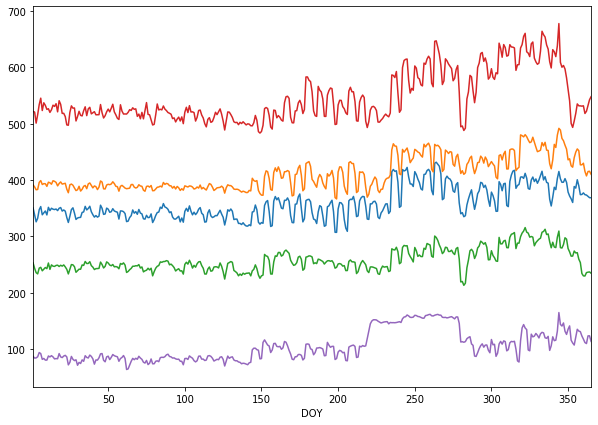

In [68]:
plt.figure(figsize=(10,7))

test31[test31['building_id']== 13].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 14].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 15].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 7].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 9].groupby('DOY').meter_reading.mean().plot()

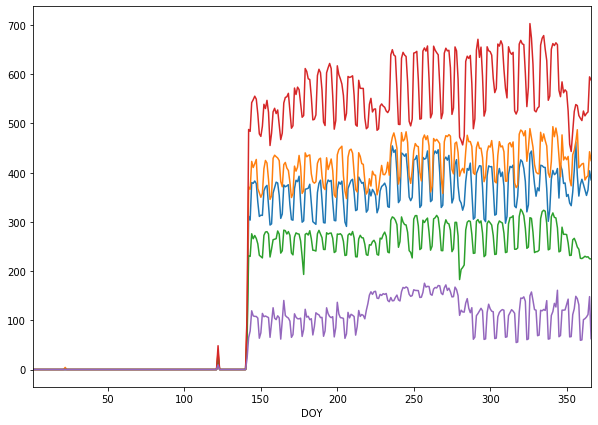

In [212]:
plt.figure(figsize=(10,7))

train3[train3['building_id']== 13].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 14].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 15].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 7].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 9].groupby('DOY').meter_reading.mean().plot()



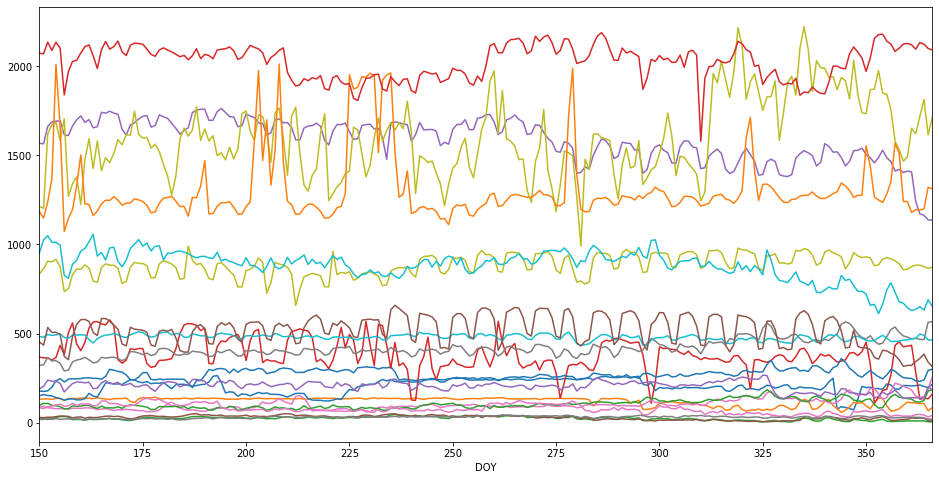

In [209]:
plt.figure(figsize=(16,8))

train3[train3['building_id']== 0].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 1].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 2].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 3].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 4].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 5].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 6].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 8].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 10].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 11].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 12].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 16].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 17].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 18].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 19].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 20].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 21].groupby('DOY').meter_reading.mean().plot()

train3[train3['building_id']== 22].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 23].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 24].groupby('DOY').meter_reading.mean().plot()


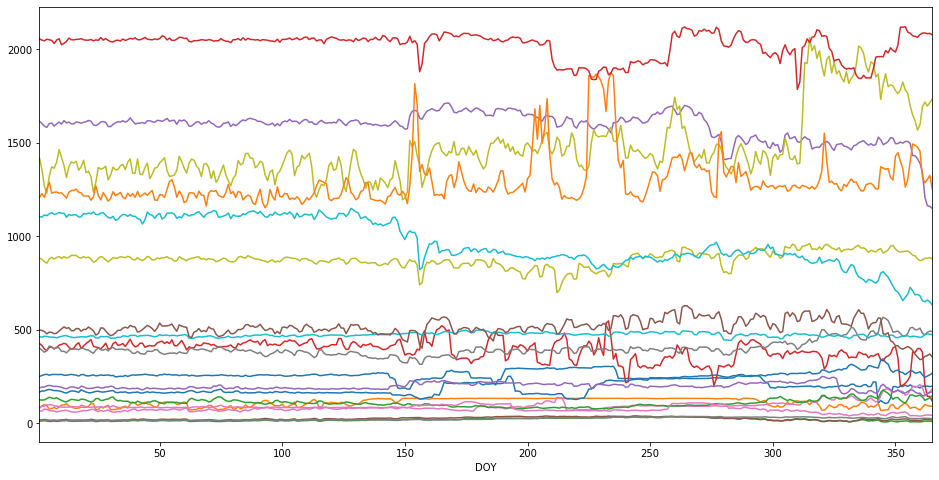

In [69]:
plt.figure(figsize=(16,8))

test31[test31['building_id']== 0].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 1].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 2].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 3].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 4].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 5].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 6].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 8].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 10].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 11].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 12].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 16].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 17].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 18].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 19].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 20].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 21].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 22].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 23].groupby('DOY').meter_reading.mean().plot()
test31[test31['building_id']== 24].groupby('DOY').meter_reading.mean().plot()

In [16]:
train3[train3['building_id']== 13].head(5)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
13,13,0,0.0,0,16,0.11329,25.0,20.0,0.0,0.666235,0.000000,0.000000,0.258819,0.965926,1
2314,13,0,0.0,0,16,0.11329,24.4,21.1,-1.0,0.672704,1.409539,0.513030,0.500000,0.866025,1
4607,13,0,0.0,0,16,0.11329,22.8,21.1,0.0,0.672704,0.000000,0.000000,0.707107,0.707107,1
6906,13,0,0.0,0,16,0.11329,21.1,20.6,0.0,0.671410,0.000000,0.000000,0.866025,0.500000,1
9202,13,0,0.0,0,16,0.11329,20.0,20.0,-1.0,0.670116,-2.443201,-0.889252,0.965926,0.258819,1


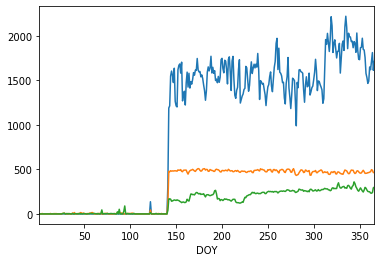

In [97]:
train3[train3['building_id']== 10].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 11].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 12].groupby('DOY').meter_reading.mean().plot()

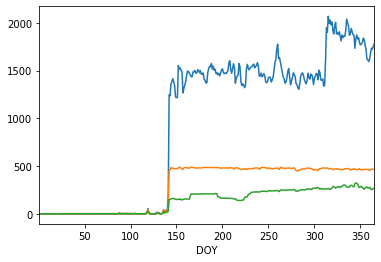

In [98]:
test3[test3['building_id']== 10].groupby('DOY').meter_reading.mean().plot()
test3[test3['building_id']== 11].groupby('DOY').meter_reading.mean().plot()
test3[test3['building_id']== 12].groupby('DOY').meter_reading.mean().plot()

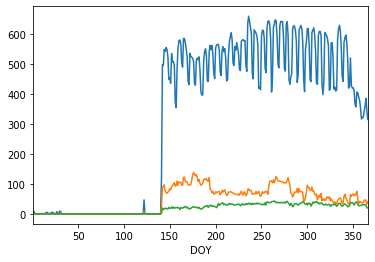

In [99]:
train3[train3['building_id']== 20].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 21].groupby('DOY').meter_reading.mean().plot()
train3[train3['building_id']== 22].groupby('DOY').meter_reading.mean().plot()

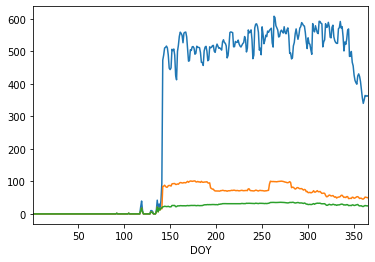

In [100]:
test3[test3['building_id']== 20].groupby('DOY').meter_reading.mean().plot()
test3[test3['building_id']== 21].groupby('DOY').meter_reading.mean().plot()
test3[test3['building_id']== 22].groupby('DOY').meter_reading.mean().plot()

In [38]:
# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

Test Data metrics
The rmse of prediction is: 140.28358767215116
Variance score: 0.98
Root Mean squared Log error: 0.72


In [34]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


hyper_params = {
    'boosting_type' : 'dart','metric': ['l2', 'mean_squared_log_error'],'learning_rate': 0.25,
    'feature_fraction': 0.9,'bagging_fraction': 0.7,'bagging_freq': 10,'verbose': 0,
    "max_depth": 48,"num_leaves": 1500,  "max_bin": 1000, "num_iterations": 200, "n_estimators": 250
}
# train
gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=25)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 494.632	valid_0's l2: 562844
[2]	valid_0's l1: 424.807	valid_0's l2: 438816


/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/lightgbm/callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3]	valid_0's l1: 324.353	valid_0's l2: 266440
[4]	valid_0's l1: 250.64	valid_0's l2: 169822
[5]	valid_0's l1: 195.734	valid_0's l2: 112069
[6]	valid_0's l1: 155.787	valid_0's l2: 78185
[7]	valid_0's l1: 127.694	valid_0's l2: 59056.5
[8]	valid_0's l1: 145.473	valid_0's l2: 67373.7
[9]	valid_0's l1: 120.107	valid_0's l2: 52129
[10]	valid_0's l1: 101.579	valid_0's l2: 42513.1
[11]	valid_0's l1: 90.5053	valid_0's l2: 37537.1
[12]	valid_0's l1: 100.179	valid_0's l2: 41538.3
[13]	valid_0's l1: 86.8597	valid_0's l2: 35555.5
[14]	valid_0's l1: 77.652	valid_0's l2: 32146.4
[15]	valid_0's l1: 70.8492	valid_0's l2: 29564.2
[16]	valid_0's l1: 67.3485	valid_0's l2: 28543.6
[17]	valid_0's l1: 63.5717	valid_0's l2: 27112.6
[18]	valid_0's l1: 60.9681	valid_0's l2: 26186.9
[19]	valid_0's l1: 59.825	valid_0's l2: 25899
[20]	valid_0's l1: 58.1554	valid_0's l2: 25195.5
[21]	valid_0's l1: 62.3664	valid_0's l2: 25833.2
[22]	valid_0's l1: 59.6626	valid_0's l2: 24961
[23]	valid_0's l1: 57.7926	valid_0's l2: 

[170]	valid_0's l1: 50.4434	valid_0's l2: 19649.6
[171]	valid_0's l1: 49.4301	valid_0's l2: 19392
[172]	valid_0's l1: 52.5963	valid_0's l2: 19850.4
[173]	valid_0's l1: 50.7374	valid_0's l2: 19491.7
[174]	valid_0's l1: 49.9194	valid_0's l2: 19331.1
[175]	valid_0's l1: 49.116	valid_0's l2: 19103.4
[176]	valid_0's l1: 49.6046	valid_0's l2: 19249.9
[177]	valid_0's l1: 50.0381	valid_0's l2: 19469.5
[178]	valid_0's l1: 50.4309	valid_0's l2: 19743.9
[179]	valid_0's l1: 49.4018	valid_0's l2: 19396.2
[180]	valid_0's l1: 49.9039	valid_0's l2: 19588.8
[181]	valid_0's l1: 49.0403	valid_0's l2: 19301
[182]	valid_0's l1: 48.9652	valid_0's l2: 19227.4
[183]	valid_0's l1: 48.7373	valid_0's l2: 19149.5
[184]	valid_0's l1: 48.4428	valid_0's l2: 19001.7
[185]	valid_0's l1: 48.6545	valid_0's l2: 19114.4
[186]	valid_0's l1: 48.3299	valid_0's l2: 18983.3
[187]	valid_0's l1: 48.1048	valid_0's l2: 18897.5
[188]	valid_0's l1: 47.9388	valid_0's l2: 18836.4
[189]	valid_0's l1: 48.2333	valid_0's l2: 18956.5
[190]

In [31]:
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

Test Data metrics
The rmse of prediction is: 137.7970695837973
Variance score: 0.98
Root Mean squared Log error: 0.92


# Regerssion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
import gc

In [ ]:
train2 = pd.read_csv('./Data/train_A_final.csv',index_col=0)

In [ ]:
train2.head()

In [0]:
from sklearn.model_selection import train_test_split

x = train2.drop(['meter_reading'],axis=1)
y = train2['meter_reading']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16172880, 14), (4043220, 14), (16172880,), (4043220,))

In [0]:

import gc
gc.collect();

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import math

## Light GBM Regressor

In [0]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


hyper_params = {
    'boosting_type' : 'dart',
    'metric': ['l2', 'mean_squared_log_error'],
    'learning_rate': 0.08,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 12,
    "num_leaves": 256,  
    "max_bin": 25,
    "num_iterations": 2000,
    "n_estimators": 250
}

gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=25)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 2.42022e+10	valid_0's l1: 3699.38


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's l2: 2.38539e+10	valid_0's l1: 3663.67
[3]	valid_0's l2: 2.23738e+10	valid_0's l1: 3533.21
[4]	valid_0's l2: 2.05726e+10	valid_0's l1: 3390.48
[5]	valid_0's l2: 1.79417e+10	valid_0's l1: 3160.41
[6]	valid_0's l2: 1.6837e+10	valid_0's l1: 3065.1
[7]	valid_0's l2: 1.47826e+10	valid_0's l1: 2864.03
[8]	valid_0's l2: 1.45632e+10	valid_0's l1: 2836.16
[9]	valid_0's l2: 1.42223e+10	valid_0's l1: 2815.54
[10]	valid_0's l2: 1.3851e+10	valid_0's l1: 2803.28
[11]	valid_0's l2: 1.30373e+10	valid_0's l1: 2727.1
[12]	valid_0's l2: 1.39496e+10	valid_0's l1: 2821.13
[13]	valid_0's l2: 1.39054e+10	valid_0's l1: 2831.58
[14]	valid_0's l2: 1.22396e+10	valid_0's l1: 2652.73
[15]	valid_0's l2: 1.08389e+10	valid_0's l1: 2489.46
[16]	valid_0's l2: 9.64799e+09	valid_0's l1: 2343.92
[17]	valid_0's l2: 9.47189e+09	valid_0's l1: 2341.48
[18]	valid_0's l2: 8.46964e+09	valid_0's l1: 2208.76
[19]	valid_0's l2: 8.06294e+09	valid_0's l1: 2161.2
[20]	valid_0's l2: 7.94393e+09	valid_0's l1: 2164.7
[21]	va

In [0]:
import pickle
pickle.dump(gbm, open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_229_energy.pickle.dat", "wb"))

In [0]:
loaded_model = pickle.load(open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_229_energy.pickle.dat", "rb"))

In [0]:
# predict
y_pred = loaded_model.predict(X_test)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

Test Data metrics
The rmse of prediction is: 43887.68223169308
Variance score: 0.92
Root Mean squared Log error: 2.29


# GDBoost Regressor

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error


model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42, loss='ls',n_iter_no_change=10,tol=0.01)
model.fit(X_train, y_train)

mean_squared_error(y_train, model.predict(X_train))

y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')



In [0]:
import pickle
pickle.dump(model, open("/content/drive/My Drive/Energy/ashrae-energy-prediction/GBReg_1_energy.pickle.dat", "wb"))

In [0]:
loaded_model = pickle.load(open("/content/drive/My Drive/Energy/ashrae-energy-prediction/GBReg_1_energy.pickle.dat", "rb"))

In [0]:
# predict
y_pred = loaded_model.predict(x)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y, y_pred)) :.2f}")

# others

In [0]:
sns.heatmap(test.iloc[:,8:].isnull())

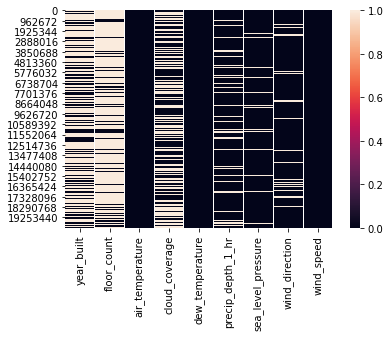

In [0]:
sns.heatmap(train.iloc[:,8:].isnull())